# US Traffic Accidents Exploratory Data Analysis




## Introduction

This is Exploratory Data Analysis using **Python** of the "US Traffic Accidents". The purpose of this project is to find out and visualize the data's main characteristics and trends using statistical methods and data visualization techniques.


# Phase 1 Ask

## About the data

The data can be found in [Kaggle](https://www.kaggle.com/sobhanmoosavi/us-accidents). This is a countrywide car accident dataset, which covers **49 states** of the USA. The accident data are collected **from February 2016 to Dec 2020**, using multiple APIs that provide streaming traffic incident (or event) data. These APIs broadcast traffic data captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road networks. Currently, there are about **1.5 million** accident records in this dataset. Check here to learn more about this dataset.

- It is important to notice that the dataset does not contain information about Alaska(AK) and Hawaï (HI).


## Objective

The purpose of this analysis is to answer the following questions:

 - Which **States** and **Cities** have the most traffic accidents?
 - What is the **time of the day**, the **day of the wee**k and **the month** with the higher number of accidents?
 - How many accidents per **year**? And what is the trend, increasing or decreasing?
 - What are the most common weather conditions on the days of the accidents?
 - How many accidents have a severity level of 1, 2, 3 and 4?

# Phase 2 Data Preparation



### Importing libraries

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

In [5]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [6]:
import folium
from folium import plugins
from folium.plugins import HeatMap

In [40]:
pip install wordcloud

In [41]:
from wordcloud import WordCloud

### Loading the dataset with Pandas

In [7]:
# Reading the dataset
accidents = pd.read_csv('C:/Users/Luciana/Desktop/Portfolio/CaseStudy4/US_Accidents_Dec20_updated.csv')

### Exploring the dataset

In [8]:
accidents

ID  Severity           Start_Time             End_Time  \
0        A-2716600         3  2016-02-08 00:37:08  2016-02-08 06:37:08   
1        A-2716601         2  2016-02-08 05:56:20  2016-02-08 11:56:20   
2        A-2716602         2  2016-02-08 06:15:39  2016-02-08 12:15:39   
3        A-2716603         2  2016-02-08 06:15:39  2016-02-08 12:15:39   
4        A-2716604         2  2016-02-08 06:51:45  2016-02-08 12:51:45   
...            ...       ...                  ...                  ...   
1516059  A-4239402         2  2019-08-23 18:03:25  2019-08-23 18:32:01   
1516060  A-4239403         2  2019-08-23 19:11:30  2019-08-23 19:38:23   
1516061  A-4239404         2  2019-08-23 19:00:21  2019-08-23 19:28:49   
1516062  A-4239405         2  2019-08-23 19:00:21  2019-08-23 19:29:42   
1516063  A-4239406         2  2019-08-23 18:52:06  2019-08-23 19:21:31   

         Start_Lat  Start_Lng   End_Lat    End_Lng  Distance(mi)  \
0         40.10891  -83.09286  40.11206  -83.03187         3.230   
1         39.86542  -84.06280  39.86501  -84.04873         0.747   
2         39.10266  -84.52468  39.10209  -84.52396         0.055   
3         39.10148  -84.52341  39.09841  -84.52241         0.219   
4         41.06213  -81.53784  41.06217  -81.53547         0.123   
...            ...        ...       ...        ...           ...   
1516059   34.00248 -117.37936  33.99888 -117.37094         0.543   
1516060   32.76696 -117.14806  32.76555 -117.15363         0.338   
1516061   33.77545 -117.84779  33.77740 -117.85727         0.561   
1516062   33.99246 -118.40302  33.98311 -118.39565         0.772   
1516063   34.13393 -117.23092  34.13736 -117.23934         0.537   

                                               Description  ...  Roundabout  \
0        Between Sawmill Rd/Exit 20 and OH-315/Olentang...  ...       False   
1                       At OH-4/OH-235/Exit 41 - Accident.  ...       False   
2                         At I-71/US-50/Exit 1 - Accident.  ...       False   
3                         At I-71/US-50/Exit 1 - Accident.  ...       False   
4                          At Dart Ave/Exit 21 - Accident.  ...       False   
...                                                    ...  ...         ...   
1516059                           At Market St - Accident.  ...       False   
1516060    At Camino Del Rio/Mission Center Rd - Accident.  ...       False   
1516061  At Glassell St/Grand Ave - Accident. in the ri...  ...       False   
1516062     At CA-90/Marina Fwy/Jefferson Blvd - Accident.  ...       False   
1516063              At Highland Ave/Arden Ave - Accident.  ...       False   

        Station   Stop Traffic_Calming Traffic_Signal Turning_Loop  \
0         False  False           False          False        False   
1         False  False           False          False        False   
2         False  False           False          False        False   
3         False  False           False          False        False   
4         False  False           False          False        False   
...         ...    ...             ...            ...          ...   
1516059   False  False           False          False        False   
1516060   False  False           False          False        False   
1516061   False  False           False          False        False   
1516062   False  False           False          False        False   
1516063   False  False           False          False        False   

        Sunrise_Sunset Civil_Twilight Nautical_Twilight Astronomical_Twilight  
0                Night          Night             Night                 Night  
1                Night          Night             Night                 Night  
2                Night          Night             Night                   Day  
3                Night          Night             Night                   Day  
4                Night          Night               Day                   Day  
...                ...            ...   

### Column names and types

In [9]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

### Statistical description of each column

In [10]:
accidents.describe()

Severity     Start_Lat     Start_Lng       End_Lat       End_Lng  \
count  1.516064e+06  1.516064e+06  1.516064e+06  1.516064e+06  1.516064e+06   
mean   2.238630e+00  3.690056e+01 -9.859919e+01  3.690061e+01 -9.859901e+01   
std    6.081481e-01  5.165653e+00  1.849602e+01  5.165629e+00  1.849590e+01   
min    1.000000e+00  2.457022e+01 -1.244976e+02  2.457011e+01 -1.244978e+02   
25%    2.000000e+00  3.385422e+01 -1.182076e+02  3.385420e+01 -1.182077e+02   
50%    2.000000e+00  3.735113e+01 -9.438100e+01  3.735134e+01 -9.437987e+01   
75%    2.000000e+00  4.072593e+01 -8.087469e+01  4.072593e+01 -8.087449e+01   
max    4.000000e+00  4.900058e+01 -6.711317e+01  4.907500e+01 -6.710924e+01   

       Distance(mi)        Number  Temperature(F)  Wind_Chill(F)  \
count  1.516064e+06  4.699690e+05    1.473031e+06   1.066748e+06   
mean   5.872617e-01  8.907533e+03    5.958460e+01   5.510976e+01   
std    1.632659e+00  2.242190e+04    1.827316e+01   2.112735e+01   
min    0.000000e+00  0.000000e+00   -8.900000e+01  -8.900000e+01   
25%    0.000000e+00  1.212000e+03    4.700000e+01   4.080000e+01   
50%    1.780000e-01  4.000000e+03    6.100000e+01   5.700000e+01   
75%    5.940000e-01  1.010000e+04    7.300000e+01   7.100000e+01   
max    1.551860e+02  9.999997e+06    1.706000e+02   1.130000e+02   

        Humidity(%)  Pressure(in)  Visibility(mi)  Wind_Speed(mph)  \
count  1.470555e+06  1.479790e+06    1.471853e+06     1.387202e+06   
mean   6.465960e+01  2.955495e+01    9.131755e+00     7.630812e+00   
std    2.325986e+01  1.016756e+00    2.889112e+00     5.637364e+00   
min    1.000000e+00  0.000000e+00    0.000000e+00     0.000000e+00   
25%    4.800000e+01  2.944000e+01    1.000000e+01     4.600000e+00   
50%    6.800000e+01  2.988000e+01    1.000000e+01     7.000000e+00   
75%    8.400000e+01  3.004000e+01    1.000000e+01     1.040000e+01   
max    1.000000e+02  5.804000e+01    1.400000e+02     9.840000e+02   

       Precipitation(in)  
count       1.005515e+06  
mean        8.477855e-03  
std         1.293168e-01  
min         0.000000e+00  
25%         0.000000e+00  
50%         0.000000e+00  
75%         0.000000e+00  
max         2.400000e+01

### Number of numeric columns

In [11]:
# int, float and boolean data
print(accidents.count(numeric_only=True))
print("Total No. of Numerical Columns:", len(accidents.count(numeric_only=True)))

Severity             1516064
Start_Lat            1516064
Start_Lng            1516064
End_Lat              1516064
End_Lng              1516064
Distance(mi)         1516064
Number                469969
Temperature(F)       1473031
Wind_Chill(F)        1066748
Humidity(%)          1470555
Pressure(in)         1479790
Visibility(mi)       1471853
Wind_Speed(mph)      1387202
Precipitation(in)    1005515
Amenity              1516064
Bump                 1516064
Crossing             1516064
Give_Way             1516064
Junction             1516064
No_Exit              1516064
Railway              1516064
Roundabout           1516064
Station              1516064
Stop                 1516064
Traffic_Calming      1516064
Traffic_Signal       1516064
Turning_Loop         1516064
dtype: int64
Total No. of Numerical Columns: 27


# Phase 3 Process 

### Checking missing data
#### Percentage of missing data for each column
Due to the high number of missing data, the columns 'Number', 'Precipitation', 'Wind_Chill(F)' are not going to be used in this analysis.

In [12]:
missing_percentage = accidents.isna().sum().sort_values(ascending=False) / len(accidents)*100
missing_percentage

Number                   69.000715
Precipitation(in)        33.675953
Wind_Chill(F)            29.637007
Wind_Speed(mph)           8.499773
Humidity(%)               3.001786
Visibility(mi)            2.916170
Weather_Condition         2.902714
Temperature(F)            2.838469
Wind_Direction            2.760965
Pressure(in)              2.392643
Weather_Timestamp         1.996222
Airport_Code              0.280199
Timezone                  0.151841
Zipcode                   0.061673
Sunrise_Sunset            0.005475
Civil_Twilight            0.005475
Nautical_Twilight         0.005475
Astronomical_Twilight     0.005475
City                      0.005475
Country                   0.000000
Give_Way                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Turning_Loop              0.000000
Traffic_Signal            0.000000
Traffic_Calming           0.000000
Stop                      0.000000
Station             

<AxesSubplot:>

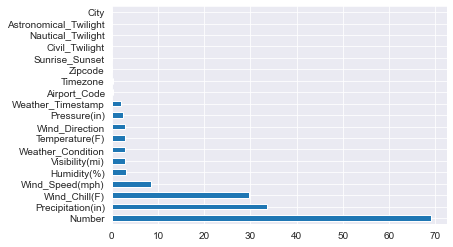

In [13]:
missing_percentage[missing_percentage != 0].plot(kind='barh')

### Checking for duplicates

In [14]:
accidents['ID'].duplicated().any()

False

# Phase 4 Exploratory Data Analysis

## Analysing the number of accidents by location

### State
#### Number of states in the dataset

- It's important to remember that the dataset does not contain information about Alaska (AK) and Hawaï (HI).
- The total number of States in the dataset is  49


In [15]:
#Distinct states in the dataset
states = accidents.State.unique()
states

array(['OH', 'IN', 'KY', 'WV', 'MI', 'PA', 'CA', 'NV', 'MN', 'TX', 'MO',
       'CO', 'OK', 'LA', 'KS', 'WI', 'IA', 'MS', 'NE', 'ND', 'WY', 'SD',
       'MT', 'NM', 'AR', 'IL', 'NJ', 'GA', 'FL', 'NY', 'CT', 'RI', 'SC',
       'NC', 'MD', 'MA', 'TN', 'VA', 'DE', 'DC', 'ME', 'AL', 'NH', 'VT',
       'AZ', 'UT', 'ID', 'OR', 'WA'], dtype=object)

In [16]:
#How many states in the dataset
len(states)

49

#### States with the most number of accidents

In [17]:
accidents_by_state = accidents.State.value_counts()
accidents_by_state

CA    448833
FL    153007
OR     87484
TX     75142
NY     60974
MN     52345
VA     51198
NC     50159
PA     42844
IL     41709
MD     35320
UT     33218
GA     31111
AZ     30185
NJ     29850
SC     28090
MI     27775
WA     22999
OH     22044
TN     21874
CO     19809
LA     19250
MO     16949
CT     15194
IN     11736
AL      9375
WI      7919
MA      6121
KY      5671
OK      5592
KS      5146
IA      4780
AR      4373
ID      4061
NH      3826
DC      3788
RI      3766
NV      3681
MT      3306
WV      3242
MS      2790
DE      2331
ME      2202
NE      2178
NM      1467
ND       455
VT       352
WY       330
SD       213
Name: State, dtype: int64

<AxesSubplot:title={'center':'No. of Accidents by State'}, xlabel='State', ylabel='count'>

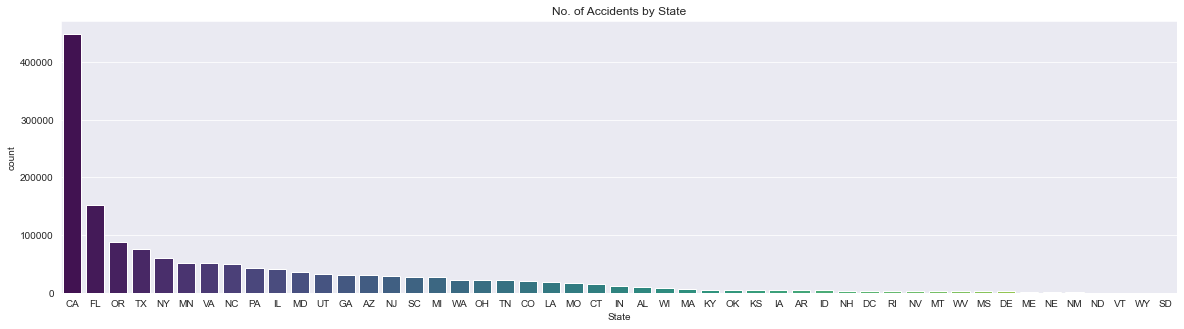

In [18]:
fig, ax = plt.subplots(figsize = (20,5))
state_plot = sns.countplot(x=accidents.State, data=accidents, order=accidents.State.value_counts().iloc[:49].index, orient = 'v', palette = "viridis")
state_plot.set_title("No. of Accidents by State")
state_plot

- California(CA) is the most populated state, followed by Texas(TX) and Florida(FL), they are also in the top 5 of the states with the higher number of accidents.
- Oregon (OR) is the 3rd state with the most number of accidents and the 27th most populated state in the US.

### Cities

#### Number of cities in the dataset
- The dataset has 10658 distinct cities



In [19]:
cities = accidents.City.unique()
len(cities)

10658

#### Accidents per city

In [20]:
#How many accidents by city
accidents_by_city = accidents.City.value_counts()
accidents_by_city

Los Angeles    39984
Miami          36233
Charlotte      22203
Houston        20843
Dallas         19497
               ...  
Keyser             1
Holtville          1
Hertford           1
Pelican            1
Deputy             1
Name: City, Length: 10657, dtype: int64

#### Top 20 cities with the most number of accidents

In [21]:
#top 20 cities with the most number of accidents
accidents_by_city[:20]

Los Angeles     39984
Miami           36233
Charlotte       22203
Houston         20843
Dallas          19497
Sacramento      18431
Orlando         16169
Portland        14805
San Diego       14090
Minneapolis     12653
Atlanta         11854
Chicago         11507
Saint Paul      10084
Phoenix          9934
Raleigh          9516
San Jose         9362
Richmond         8472
Nashville        8381
Riverside        8201
Jacksonville     7815
Name: City, dtype: int64

<AxesSubplot:title={'center':'No. of Accidents by City - Top 50 cities'}, xlabel='City', ylabel='count'>

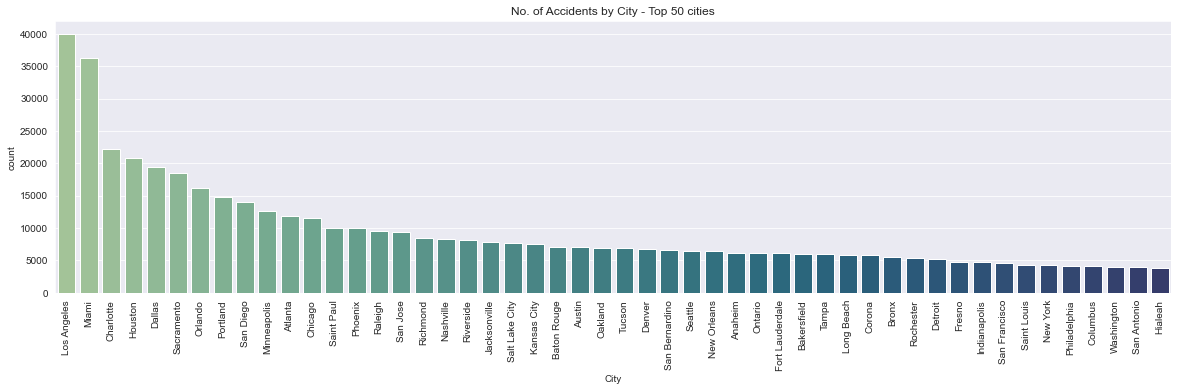

In [22]:
fig, ax = plt.subplots(figsize = (20,5))
city_plot = sns.countplot(x=accidents.City, data=accidents, order=accidents.City.value_counts().iloc[:50].index, orient = 'v', palette = "crest")
city_plot.set_title("No. of Accidents by City - Top 50 cities")
city_plot.set_xticklabels(city_plot.get_xticklabels(), rotation=90)
city_plot

#### Percentage of cities with more and less than 1000 accidents
- Only 2.35% of the cities have more than 1000 accidents

In [23]:
# Calculating the number of cities with more and less than 1000 accidents
high_accident_city = accidents_by_city[accidents_by_city >=1000]
low_accident_city = accidents_by_city[accidents_by_city <1000]

In [24]:
# Percentage of Cities with more than 1000 accidents
len(high_accident_city) / len(cities)*100

2.3550384687558643

In [25]:
# Percentage of Cities with more than 1000 accidents
len(low_accident_city) / len(cities)*100

97.63557890786264

### Distribution on a map

#### Creating a dataset sample of 10%

In [26]:
sample_accidents = accidents.sample(int(0.1 * len(accidents)))

In [27]:
map = folium.Map(location = [40, -102], zoom_start = 4)
folium.plugins.HeatMap(zip(list(sample_accidents.Start_Lat), list(sample_accidents.Start_Lng)), scale_radius = False, radius = 12).add_to(map)
map

- There is a lower number of accidents in the central regions. That is also the regions less populated
- Both coasts have a higher number of accidents.

## Analysing the Timestamp of the accidents 

### Time

#### Checking the Start_Time column

In [28]:
accidents.Start_Time

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:15:39
4          2016-02-08 06:51:45
                  ...         
1516059    2019-08-23 18:03:25
1516060    2019-08-23 19:11:30
1516061    2019-08-23 19:00:21
1516062    2019-08-23 19:00:21
1516063    2019-08-23 18:52:06
Name: Start_Time, Length: 1516064, dtype: object

#### Converting Start_Time column to a 'datetime' format

In [29]:
accidents.Start_Time = pd.to_datetime(accidents.Start_Time)
accidents.Start_Time[0]

Timestamp('2016-02-08 00:37:08')

#### Number of accidents per hour of the day

<AxesSubplot:title={'center':'No. of Accidents by Hour'}, xlabel='Start_Time', ylabel='count'>

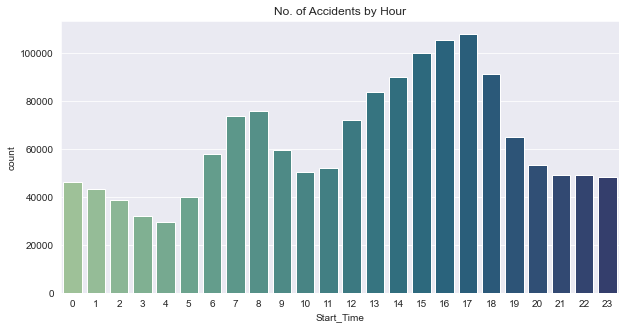

In [30]:
fig, ax = plt.subplots(figsize = (10,5))
hour_plot = sns.countplot(x=accidents.Start_Time.dt.hour, data=accidents, orient = 'v', palette = "crest")
hour_plot.set_title("No. of Accidents by Hour")
hour_plot

#### Number of accidents by day of the week

<AxesSubplot:title={'center':'No. of Accidents by day of the week'}, xlabel='Start_Time', ylabel='count'>

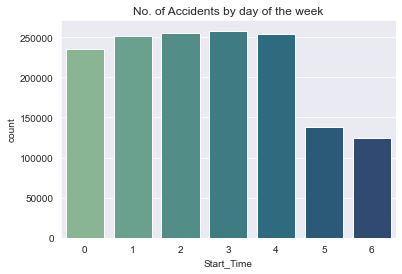

In [31]:
dayofweek_plot = sns.countplot(x=accidents.Start_Time.dt.dayofweek, data=accidents, orient = 'v', palette = "crest")
dayofweek_plot.set_title("No. of Accidents by day of the week")
dayofweek_plot

#### Number of accidents per hour on Sundays
- Sunday is the day of the week with the lower number of accidents

<AxesSubplot:title={'center':'No. of Accidents per hour on Sundays'}, xlabel='Start_Time', ylabel='count'>

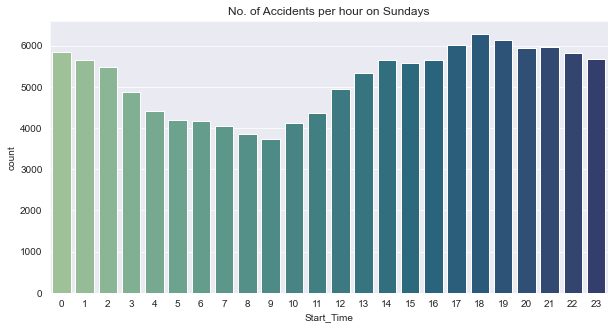

In [32]:
fig, ax = plt.subplots(figsize = (10,5))
sundays_star_time= accidents.Start_Time[accidents.Start_Time.dt.dayofweek == 6]
dayofweek_plot = sns.countplot(x=sundays_star_time.dt.hour, data=accidents, orient = 'v', palette = "crest")
dayofweek_plot.set_title("No. of Accidents per hour on Sundays")
dayofweek_plot

#### Number of accidents per hour on Thursday
- Thursday is the day of the week with the lower number of accidents

<AxesSubplot:title={'center':'No. of Accidents per hour on Thursdays'}, xlabel='Start_Time', ylabel='count'>

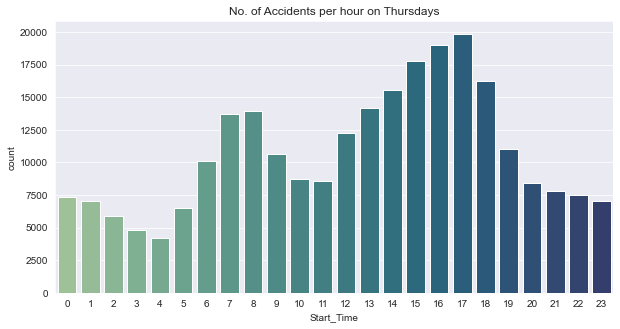

In [33]:
fig, ax = plt.subplots(figsize = (10,5))
sundays_star_time= accidents.Start_Time[accidents.Start_Time.dt.dayofweek == 3]
dayofweek_plot = sns.countplot(x=sundays_star_time.dt.hour, data=accidents, orient = 'v', palette = "crest")
dayofweek_plot.set_title("No. of Accidents per hour on Thursdays")
dayofweek_plot

#### Number of accidents by Month

<AxesSubplot:title={'center':'No. of Accidents by Month'}, xlabel='Start_Time', ylabel='count'>

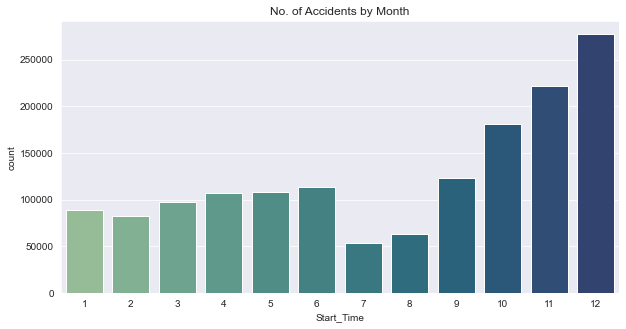

In [34]:
fig, ax = plt.subplots(figsize = (10,5))
month_plot = sns.countplot(x=accidents.Start_Time.dt.month, data=accidents, orient = 'v', palette = "crest")
month_plot.set_title("No. of Accidents by Month")
month_plot

#### Number of accidents by Year

<AxesSubplot:title={'center':'No. of Accidents by Year'}, xlabel='Start_Time', ylabel='count'>

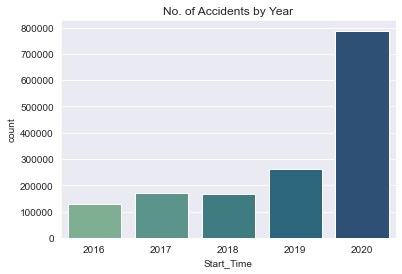

In [35]:
# Number of accidents by year
year_plot = sns.countplot(x=accidents.Start_Time.dt.year, data=accidents, orient = 'v', palette = "crest")
year_plot.set_title("No. of Accidents by Year")
year_plot

## Analyzing the Weather impact on accidents

### Weather conditions

#### Weather condition with the most accidents

In [36]:
#Top 50 weather conditions with the most accidents
weather = accidents.Weather_Condition.value_counts()
weather[:50]

Fair                            465252
Mostly Cloudy                   193595
Clear                           180223
Cloudy                          161291
Partly Cloudy                   133102
Overcast                         87853
Light Rain                       72511
Scattered Clouds                 47061
Light Snow                       22113
Fog                              19777
Haze                             17706
Rain                             17389
Fair / Windy                      6631
Heavy Rain                        6119
Light Drizzle                     4307
Mostly Cloudy / Windy             3612
Smoke                             3608
Cloudy / Windy                    3300
Snow                              2730
Partly Cloudy / Windy             2125
Light Rain / Windy                1845
T-Storm                           1516
Thunder in the Vicinity           1275
Wintry Mix                        1251
Light Rain with Thunder           1148
Light Thunderstorms and R

<AxesSubplot:title={'center':'No. of Accidents by Weather Condition'}, xlabel='Weather_Condition', ylabel='count'>

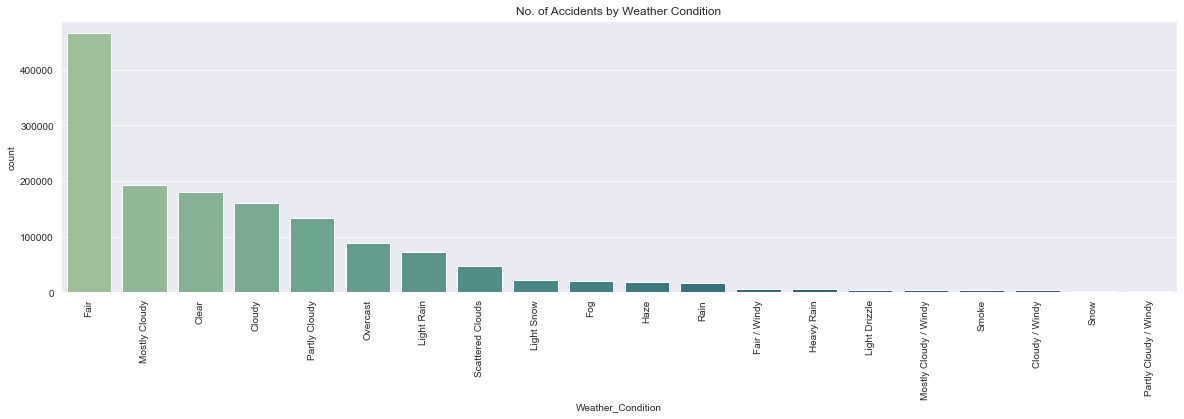

In [37]:
fig, ax = plt.subplots(figsize = (20,5))
wc_plot = sns.countplot(x=accidents.Weather_Condition, data=accidents,order=accidents.Weather_Condition.value_counts().iloc[:20].index, orient = 'v', palette = "crest")
wc_plot.set_title("No. of Accidents by Weather Condition")
wc_plot.set_xticklabels(wc_plot.get_xticklabels(), rotation=90)
wc_plot

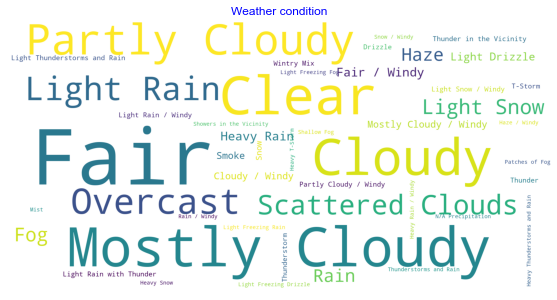

In [42]:
plt.style.use('seaborn')
plt.figure(figsize=(20,5))
weather_words = accidents['Weather_Condition'].value_counts().to_dict()
wc = WordCloud(scale=5, max_words=100,background_color ='white').generate_from_frequencies(weather_words)
plt.imshow(wc)
plt.axis('off')
plt.title('Weather condition', color='b')
plt.show()

### Temperature

#### Most common temperatures on the days of accidents

In [43]:
temperature = accidents['Temperature(F)'].value_counts()
temperature[:20]

59.0    32387
63.0    31595
68.0    30898
57.0    30862
64.0    30778
        ...  
37.4     1566
35.6     1560
33.8     1558
91.4     1432
20.0     1412
Name: Temperature(F), Length: 138, dtype: int64

<AxesSubplot:title={'center':'No. of Accidents by Temperature'}, xlabel='Temperature(F)', ylabel='count'>

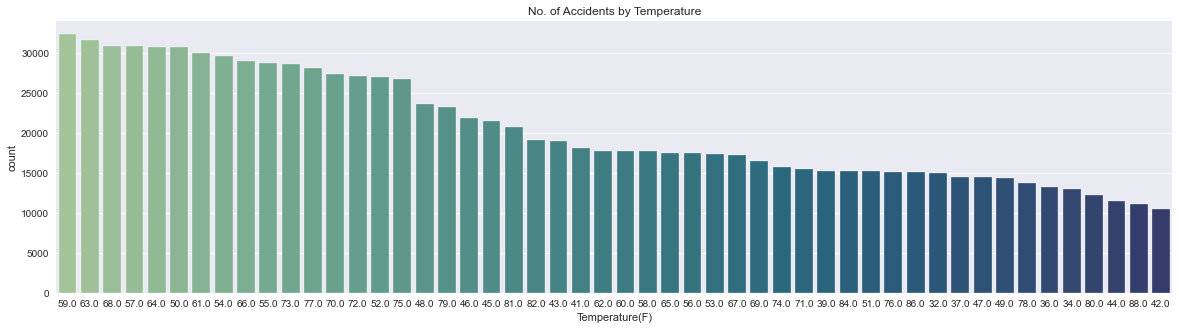

In [44]:
fig, ax = plt.subplots(figsize = (20,5))
temp_plot = sns.countplot(x=accidents['Temperature(F)'], data=accidents,order=accidents['Temperature(F)'].value_counts().iloc[:50].index, orient = 'v', palette = "crest")
temp_plot.set_title("No. of Accidents by Temperature")
temp_plot.set_xticklabels(temp_plot.get_xticklabels())
temp_plot

## Analyzing the level of severity of the accidents

### Severity
- Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).

In [45]:
severity = accidents.Severity.value_counts()/ len(accidents.Severity)*100
severity

2    79.969051
3    10.623034
4     7.549286
1     1.858629
Name: Severity, dtype: float64

array([<AxesSubplot:ylabel='Severity'>], dtype=object)

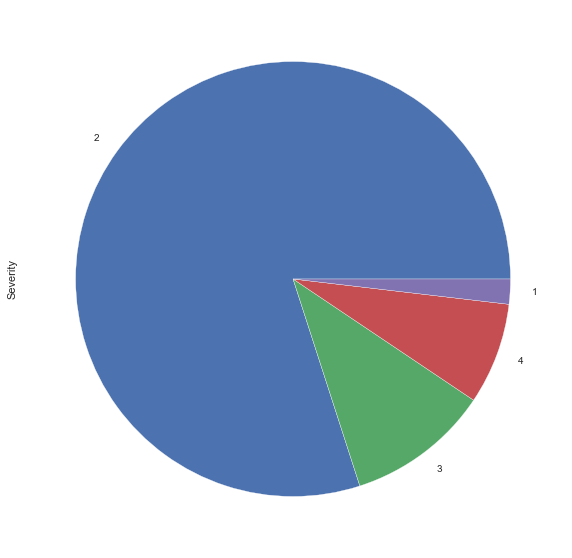

In [46]:
severity.plot.pie(subplots=True,  figsize=(20, 10))

# Phase 5 Findings

#### About the location
- The dataset does not contain information about Alaska (AK) and Hawaï (HI).
- California(CA) is the most populated state, followed by Texas(TX) and Florida(FL), they are also in the top 5 of the states with the higher number of accidents.
- Oregon (OR) is the 3rd state with the most number of accidents and the 27th most populated state in the US.
- Only 2,35 % of the cities have more than 1000 accidents 
- 1167 cities reported just 1 accident ( Need to investigate further)
- The number of accidents per city decreases exponentially

#### About the Timestamp
- In the mornings, accidents start to increase at 5 am and reach a higher point at 8 am. 
- In the afternoon accidents start to increase at 13pm and reaches the higher point at 17pm
- The number of accidents is lower on weekends
- On weekends the distribution of accidents per hour is different than on weekdays. It increases at 12am and start to decrease at 1am
- The number of accidents is higher in October, November and December. December is the mont with the most number of accidents. 
- It's important to noticed that the dataset starts in February 2016. The month of January 2016 is missing in this dataset.
- 2020 has a significantly higher number of accidents. This is an issue that needs further investigation.

#### About the Weather
- Interestingly, most accidents happen on the days with a Fairweather, follow by days Mostly Cloudy.
- Most accidents happen on days with temperatures between 50°F and 75°F (10°C and 23°C)

#### About the Severity
- Most accidents have a severity level of 2, 79.96% which means a lower impact on traffic. Level 4, high impact on traffic comes on third place with 7.5%.

### Acknowledgements
Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. **“A Countrywide Traffic Accident Dataset.”**, 2019.

Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. **"Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights."** In proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019.